In [ ]:
!pip install pandas_ta

In [ ]:
import yfinance as yf
import pandas as pd

# Step 1: Choose a stock symbol and set the time range
stock_symbols = ['AAPL','AAT','AAU']  # Replace with the symbol of the stock you're interested in
start_date = '2021-01-01'
end_date = '2024-01-01'

for stock_symbol in stock_symbols:
  # Step 2: Fetch historical stock data
  stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

  # Print the obtained data
  print(stock_data.head())

  # Optional: Save the data to a CSV file
  stock_data.to_csv(f'{stock_symbol}_historical_data.csv')


/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-01-04  133.520004  133.610001  126.760002  129.410004  127.164185   
2021-01-05  128.889999  131.740005  128.429993  131.009995  128.736389   
2021-01-06  127.720001  131.050003  126.379997  126.599998  124.402931   
2021-01-07  128.360001  131.630005  127.860001  130.919998  128.647919   
2021-01-08  132.429993  132.630005  130.229996  132.050003  129.758331   

               Volume  
Date                   
2021-01-04  143301900  
2021-01-05   97664900  
2021-01-06  155088000  
2021-01-07  109578200  
2021-01-08  105158200  
                 Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2021-01-04  28.799999  29.209999  27.320000  27.389999  23.922285  236600
2021-01-05  27.440001  27.830000  27.240000  27.639999  24.140638  203800
2021-01-06  27.98

[*********************100%%**********************]  1 of 1 completed

            Open  High   Low  Close  Adj Close   Volume
Date                                                   
2021-01-04  0.48  0.49  0.48   0.49       0.49  1647300
2021-01-05  0.49  0.52  0.49   0.51       0.51  2587200
2021-01-06  0.52  0.55  0.51   0.52       0.52  2651700
2021-01-07  0.54  0.55  0.51   0.52       0.52  1567100
2021-01-08  0.54  0.54  0.49   0.51       0.51  2319700


In [ ]:
import pandas as pd
import numpy as np
import pandas_ta as ta

# Step 1: Choose an asset and gather closing prices for the last 3 years
# Let's assume we're analyzing the stock of ABC company
# You need to replace 'your_stock_data.csv' with your actual dataset
data = pd.read_csv('/content/AAPL_historical_data.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Step 2: Calculate returns
data['Returns'] = data['Close'].pct_change()

data.head()

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2021-01-04,133.520004,133.610001,126.760002,129.410004,127.164185,143301900,NaN
2021-01-05,128.889999,131.740005,128.429993,131.009995,128.736389,97664900,0.012364
2021-01-06,127.720001,131.050003,126.379997,126.599998,124.402931,155088000,-0.033662
2021-01-07,128.360001,131.630005,127.860001,130.919998,128.647919,109578200,0.034123
2021-01-08,132.429993,132.630005,130.229996,132.050003,129.758331,105158200,0.008631


In [ ]:
# Step 3: Calculate technical indicators
data.ta.sma(length=100, append=True)
data.ta.rsi(length=100, append=True)
data.ta.bbands(length=100, append=True)
data.ta.macd(append=True)

data

,Open,High,Low,Close,Adj Close,Volume,Returns,SMA_100,RSI_100,BBL_100_2.0,BBM_100_2.0,BBU_100_2.0,BBB_100_2.0,BBP_100_2.0,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
Date,,,,,,,,,,,,,,,,,
2021-01-04,133.520004,133.610001,126.760002,129.410004,127.164185,143301900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05,128.889999,131.740005,128.429993,131.009995,128.736389,97664900,0.012364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-06,127.720001,131.050003,126.379997,126.599998,124.402931,155088000,-0.033662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-07,128.360001,131.630005,127.860001,130.919998,128.647919,109578200,0.034123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-08,132.429993,132.630005,130.229996,132.050003,129.758331,105158200,0.008631,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.600006,37122800,-0.005547,181.768301,54.717544,165.573170,181.768301,197.963432,17.819533,0.865286,2.636317,-0.600373,3.236689
2023-12-26,193.610001,193.889999,192.830002,193.050003,193.050003,28919300,-0.002841,181.787101,54.540953,165.544064,181.787101,198.030138,17.870396,0.846699,2.306308,-0.744305,3.050613
2023-12-27,192.490005,193.500000,191.089996,193.149994,193.149994,48087700,0.000518,181.898701,54.567879,165.499024,181.898701,198.298378,18.031659,0.843034,2.029448,-0.816932,2.846380


In [ ]:
data.dropna(inplace=True)

In [ ]:
# Step 4: Correlation analysis
correlation_matrix = data[['Returns', 'SMA_100',	'RSI_100',	'BBL_100_2.0', 'MACD_12_26_9']].corr()
print(correlation_matrix)
# Step 5: Combine indicators using weighted average
weights = correlation_matrix['Returns'].abs().sort_values(ascending=False).drop('Returns')
print(weights)
weights = weights / weights.sum()


data['CombinedIndicator'] = (
    data['SMA_100'] * weights['SMA_100'] +
    data['RSI_100'] * weights['RSI_100'] +
    data['BBL_100_2.0'] * weights['BBL_100_2.0'] +
    data['MACDh_12_26_9'] * weights['MACD_12_26_9']
)

# Step 6: Methodology to predict bullish and bearish positions
# You can define a threshold for the CombinedIndicator to determine bullish and bearish positions
threshold = 0.0
data['Signal'] = np.where(data['CombinedIndicator'] > threshold, 'Bullish', 'Bearish')

# Print the resulting DataFrame
print(data[['Close','Returns', 'SMA_100', 'RSI_100', 'BBL_100_2.0', 'MACDh_12_26_9', 'CombinedIndicator', 'Signal']])


               Returns   SMA_100   RSI_100  BBL_100_2.0  MACD_12_26_9
Returns       1.000000 -0.055568  0.137443    -0.043005      0.049032
SMA_100      -0.055568  1.000000  0.007826     0.950181     -0.181637
RSI_100       0.137443  0.007826  1.000000     0.015718      0.742741
BBL_100_2.0  -0.043005  0.950181  0.015718     1.000000     -0.166716
MACD_12_26_9  0.049032 -0.181637  0.742741    -0.166716      1.000000
RSI_100         0.137443
SMA_100         0.055568
MACD_12_26_9    0.049032
BBL_100_2.0     0.043005
Name: Returns, dtype: float64
                 Close   Returns     SMA_100    RSI_100  BBL_100_2.0  \
Date                                                                   
2021-05-27  125.279999 -0.012377  128.795700  48.433600   117.261730   
2021-05-28  124.610001 -0.005348  128.731700  48.144931   117.176581   
2021-06-01  124.279999 -0.002648  128.708500  48.002592   117.127069   
2021-06-02  125.059998  0.006276  128.649900  48.367047   117.054528   
2021-06-03  123.54

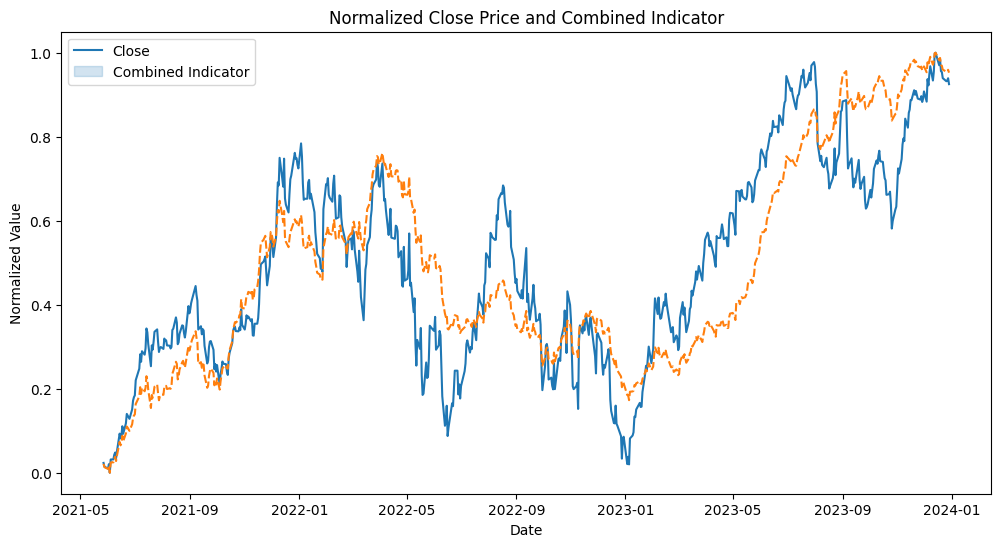

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_normalized = pd.DataFrame(scaler.fit_transform(data[['Close', 'CombinedIndicator']]), columns=['Close', 'CombinedIndicator'])
data_normalized.set_index(data.index, inplace=True)

# Step 8: Plot the data using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=data_normalized)
plt.title('Normalized Close Price and Combined Indicator')
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.legend(['Close', 'Combined Indicator'])
plt.show()

In [ ]:
  # Assuming 'ActualReturns' is the actual percentage change in price
best_acc=0
thershold=0
for i in np.arange(min(data['CombinedIndicator']),max(data['CombinedIndicator']),0.01):
    data['ActualReturns'] = data['Close'].pct_change()

  # Determine predicted signals
    data['PredictedSignal'] = np.where(data['CombinedIndicator'] > i, 1, -1)

  # Calculate accuracy
    data['CorrectPrediction'] = np.where(data['PredictedSignal'] * data['ActualReturns'] > 0, 1, 0)
    accuracy = data['CorrectPrediction'].sum() / data['CorrectPrediction'].count()
    if accuracy>best_acc:
      best_acc=accuracy
      thershold=i

In [ ]:
data['ActualReturns'] = data['Close'].pct_change()

# Determine predicted signals
data['PredictedSignal'] = np.where(data['CombinedIndicator'] > 65.96963664824781, 1, -1)

# Calculate accuracy
data['CorrectPrediction'] = np.where(data['PredictedSignal'] * data['ActualReturns'] > 0, 1, 0)
accuracy = data['CorrectPrediction'].sum() / data['CorrectPrediction'].count()

print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 52.99%
